<a href="https://colab.research.google.com/github/chae-eun-22/AIStudy25/blob/master/09_03_LSTM_GRU(%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LSTM과 GRU 셀 : 순환 신경망에서 빼 놓을 수 없는 핵심 기술

# 전에 배웠던 SimpleRNN 보다 훨씬 복잡하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택됨
# 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다.
# 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석됨
# 멀리 떨어져 있는 단어 정보를 인식하는데 어려울 수 있음 그래서 LSTM과 GRU를 사용함

# LSTM(Long Short-Term Memory)는 말 그대로 단기 기억을 오래 기억하기 위해서 고안됨
# 기본 개념은 동일함
# 입력과 가중치를 곱하고 절편을 더해 활성함수를 통과시키는 구조를 여러개 가짐
# 이런 계산 결과는 다음 타임스텝에 재사용됨

# 1. 은닉상태 만듦 : 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
# 이때 기본 순환층과는 달리 스그모이드 활성화 함수를 사용함
# 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듦

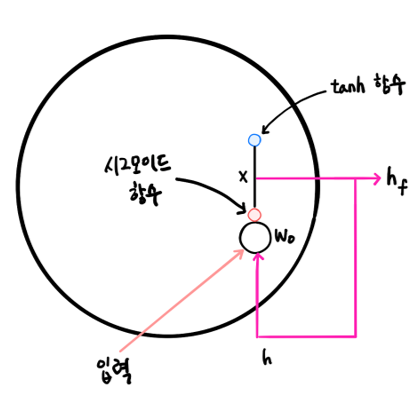

In [2]:
# 위 그림은 가중치 w_x와 w_h를 통틀어 w_o라고 표시함
# 파란색 원인 tanh 함수, 주황색 원은 스그모이드 함수임
# x는 곱셈을 나타내고 있음 -> 기본 순환층과 크게 다르지 않음

# tanh 함수를 통과하는 값은???
# LSTM는 순환되는 상태가 2개이다. (은닉상태, 셀 상태)
# 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고, LSTM 셀에서 순환만 되는 값이다.

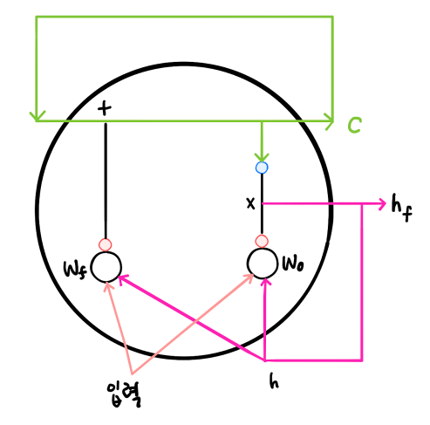

In [ ]:
# 위 그림의 녹색은 순환되는 셀의 상태임
# 셀 상태를 은닉 상태 h와 구분하여 c로 표시함

# 셀 상태를 계산하는 과정
# 먼저 입력과 은닉 상태를 또 가중치 w_f에 곱한 다음 시그모이드 함수를 통과함
# 그 다음 이전 타임스탭의 셀 상태와 곱하여 새로운 셀의 상태를 만듦
# 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는데 기여함
# LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀 같다.
# 중요한 것은 입력과 은닉 상태에서 곱해지는 가중치 w_o와 w_f가 다름 -> 이 두 작은 셀은 각기 다른 기능을 위해 훈련됨

# 여기에 2개의 작은 셀이 더 추가되어 셀의 상태를 만드는 데 기여함

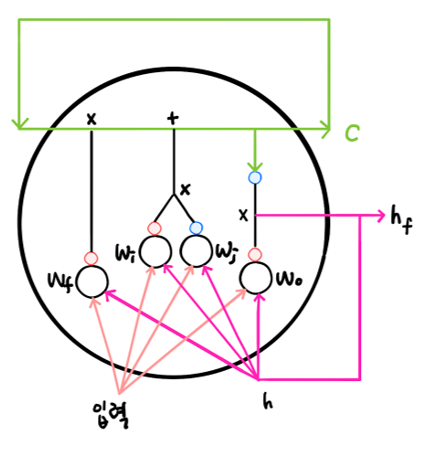

In [3]:
# 위 그림을 보면 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음
# 하나는 시그모이드 함수를 통과
# 다른 하나는 tanh 함수를 통과 시킨다.
# 그 다음 두 결과를 곱한 후 이전 셀의 상태와 더함(최종상태의 셀임)

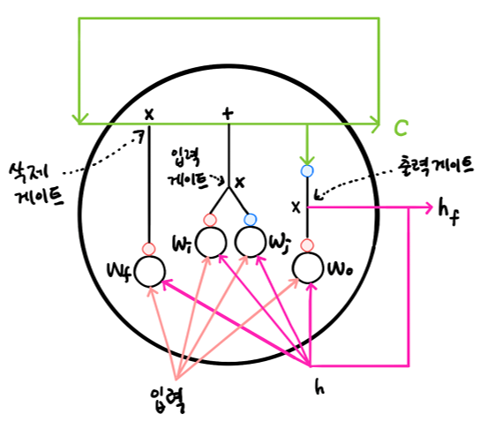

In [4]:
# 세군데 곱셈을 삭제 게이트, 입력 게이트, 출력 게이트라고 부름
# 삭제 게이트는 셀의 상태에 있는 정보를 제거하는 역할
# 입력 게이트는 새로운 정보를 셀 상태에 추가
# 출력 게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력
# 위의 처리는 케라스의 LSTM 클래스가 알아서 돌림

In [8]:
# LSTM 신경망 훈련하기
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb  # LSTM 신경망 훈련하기
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)  # 어휘 사전을 500개로 증가시켜 실습

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

print(train_input.shape, val_input.shape, test_input.shape)
#       (20000,)             (5000,)            (25000,)

(20000,) (5000,) (25000,)


In [9]:
# 케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때 패딩을 추가함
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)  # truncating='pre' 생략 가능
val_seq = pad_sequences(val_input,  maxlen=100)

print(train_seq[5]) # 여섯번째 토큰을 확인해보면 앞쪽에 0으로 채워짐

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [11]:
# LSTM 셀을 사용한 순환층을 만들어보자!!! (예전에 썼던 SimpleRNN클래스를 LSTM으로 변경만 하면 됨)
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))  # 벡터 이용한 토큰 처리
                                # num_words=500 어휘사전크기
                                    # 임베딩벡터크기 16
                                        # maxlen=100
model.add(keras.layers.LSTM(8)) # 뉴런개수 8
model.add(keras.layers.Dense(1, activation='sigmoid')) # 활성화 함수 시그모이드(2진분류)

model.summary()
# SimpleRNN 클래스의 모델 파라미터 개수는 200개였다.
# LSTM 셀에는 작은 셀이 4개 있으므로 정확히 800개임

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 컴파일하고 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm=model.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 배치 크기는 64개, 에포크 횟수는 100으로 지정
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                            # batch_size=64, 몇 개의 샘플로 가중치를 갱신할 것인지 설정합니다.
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])   # 체크포인트, 조기종료 동일

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.5221 - loss: 0.6928 - val_accuracy: 0.5930 - val_loss: 0.6912
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.6024 - loss: 0.6904 - val_accuracy: 0.6388 - val_loss: 0.6868
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.6461 - loss: 0.6844 - val_accuracy: 0.6710 - val_loss: 0.6704
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6844 - loss: 0.6551 - val_accuracy: 0.7086 - val_loss: 0.6206
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7150 - loss: 0.6128 - val_accuracy: 0.7164 - val_loss: 0.6009
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.7290 - loss: 0.5933 - val_accuracy: 0.7368 - val_loss: 0.5821
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.7427 - loss: 0.5748 - val_accuracy: 0.7496 - val_loss: 0.5642
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7539 - loss: 0

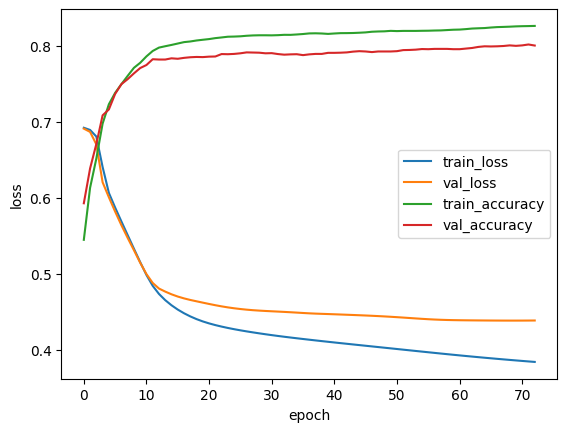

In [16]:
# 73회 24분 정도 걸림!
# 82.81% 정확도로 나옴

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [18]:
# 결과를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 수행하는 것처럼 보임
# 하지만 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다. (드롭 아웃)

# 완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해서 드롭아웃을 적용하였었다.
# 이를 통해 모델이 훈련세트에 너무 과대적합되는 것을 막았었음

# 순환층은 자체적으로 드롭아웃 기능을 제공한다.
#   -> 드롭아웃 : 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막음

# SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
# dropout 셀의 입력에 드롭아웃을 적용, recurrent_dropout은 순환은닉 상태에 드롭아웃을 적용함
# recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못함(모델의 훈련속도가 크게 느려짐)
# 그래서 이번에는 dropout만 적용해볼 것

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3))   # 드롭아웃 매개값 0.3으로 지정(30% 입력의 드롭아웃)
model2.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.5083 - loss: 0.6929 - val_accuracy: 0.5498 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.5544 - loss: 0.6918 - val_accuracy: 0.5944 - val_loss: 0.6906
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.5943 - loss: 0.6896 - val_accuracy: 0.6242 - val_loss: 0.6867
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.6256 - loss: 0.6840 - val_accuracy: 0.6604 - val_loss: 0.6714
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.6738 - loss: 0.6577 - val_accuracy: 0.6996 - val_loss: 0.6019
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7014 - loss: 0.5944 - val_accuracy: 0.7242 - val_loss: 0.5736
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7215 - loss: 0.5701 - val_accuracy: 0.7334 - val_loss: 0.5530
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7443 - loss: 0

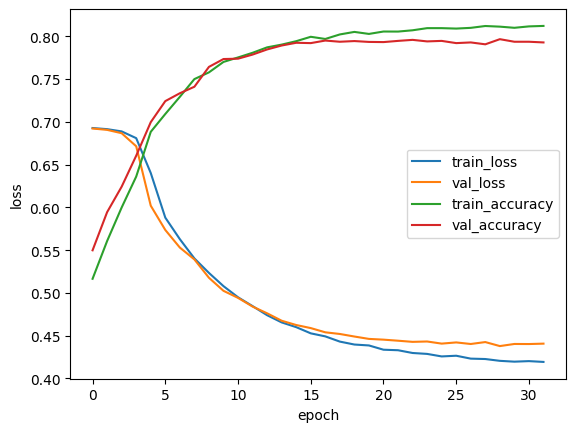

In [21]:
# 드롭아웃 전에는 73회 에포크에 82.81% 정확도로 나옴 24분 걸림
# 드롭아웃 이후에는 32회 에포크에 81.25% 정확도이고 13분 걸림
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()  # 훈련손실과 검증 손실 차이가 좁혀진 것을 확인할 수 있음

# Epoch 73/100 드롭아웃 적용 전
# - accuracy: 0.8281 - loss: 0.3811 - val_accuracy: 0.8004 - val_loss: 0.4389
# 0.4389 - 0.3811 = 0.0578

# Epoch 32/100 드롭아웃 적용 후
# - accuracy: 0.8125 - loss: 0.4202 - val_accuracy: 0.7928 - val_loss: 0.4407
# 0.4407 - 0.4202 = 0.0205

In [22]:
# 전에도 conv2d를 2개로 쌓아 훈련을 진행하였다.
# 이번에도 LSTM를 2개 만들어 2개의 층 연결해보자.

# 순환층을 연결할 때는 한가지 주의할 점이 있는데
# 순환층의 은닉 상태는 샘플의 마지막 타임스탭에 대한 은닉 상태만 다음층으로 전달됨

# 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
# 앞쪽의 순환층이 모든 타임스탭에 대한 은닉상태를 출력해야 함
# 오직 마지막 순환층만 마지막 타임스탭의 은닉 상태를 출력해야 한다. ( 처음에 본 그림)

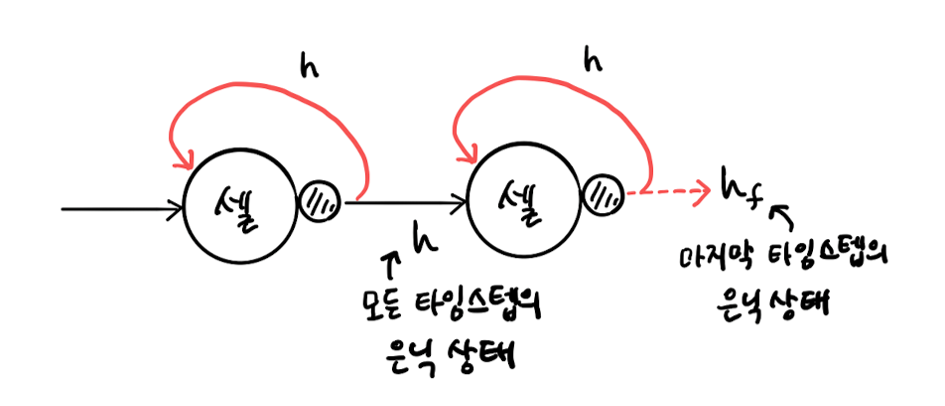

In [23]:
# 케라스의 순환층에서 모든 타임스탭의 은닉 상태를 출력하려면
# 마지막을 제외한 다른 모든 순환층에서 return_sequences=True로 지정함
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))    # 1번 LSTM
model3.add(keras.layers.LSTM(8, dropout=0.3))                           # 2번 LSTM
model3.add(keras.layers.Dense(1, activation='sigmoid')) # 긍정 부정 리뷰에 대한 2진분류

model3.summary()
# 첫번째 LSTM 층이 모든 타임스탭(100개)의 은닉상태를 출력하기 때문에
# 출력 크기가(None, 100, 8)로 표시됨

# 이에 반해 두 번째 LSTM층의 출력 크기는 마지막 타임스탭의 은닉상태만 출력하기 때문에
# (None, 8)이다.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 훈련시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.4988 - loss: 0.6931 - val_accuracy: 0.5314 - val_loss: 0.6929
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.5298 - loss: 0.6927 - val_accuracy: 0.5734 - val_loss: 0.6920
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.5581 - loss: 0.6913 - val_accuracy: 0.6328 - val_loss: 0.6869
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.6155 - loss: 0.6818 - val_accuracy: 0.6808 - val_loss: 0.6399
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.6767 - loss: 0.6232 - val_accuracy: 0.7176 - val_loss: 0.5666
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.7129 - loss: 0.5722 - val_accuracy: 0.7306 - val_loss: 0.5458
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.7402 - loss: 0.5411 - val_accuracy: 0.7474 - val_loss: 0.5193
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.7541 - loss: 

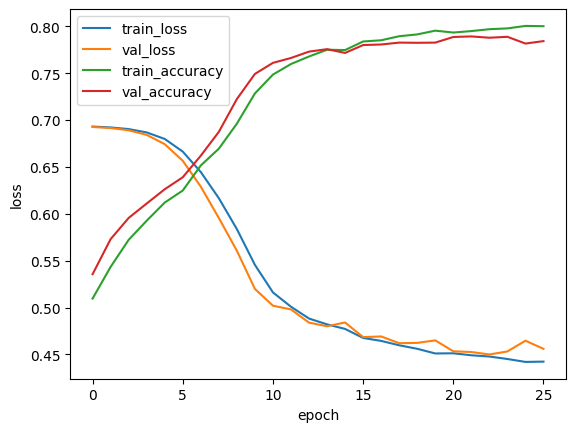

In [38]:
# 드롭아웃 전에는 73회 에포크에 82.81% 정확도로 나옴 24분 걸림
# 드롭아웃 이후에는 32회 에포크에 81.25% 정확도이고 13분 걸림
# 층을 추가하고 return_sequences=True로 진행한 이후 19분에 31회 80.82% 정확도가 나옴

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()  # 과대적합을 제어하면서 손실을 최대한 낮춘 느낌이다.

# Epoch 73/100 드롭아웃 적용 전
# - accuracy: 0.8281 - loss: 0.3811 - val_accuracy: 0.8004 - val_loss: 0.4389
# 0.4389 - 0.3811 = 0.0578

# Epoch 32/100 드롭아웃 적용 후
# - accuracy: 0.8125 - loss: 0.4202 - val_accuracy: 0.7928 - val_loss: 0.4407
# 0.4407 - 0.4202 = 0.0205

# Epoch 31/100 2개층 드롭아웃 적용 후
# - accuracy: 0.8082 - loss: 0.4287 - val_accuracy: 0.7904 - val_loss: 0.4447
# 0.4447 - 0.4287 = 0.016

In [28]:
# RGU(Gated Recurrent Units) 구조
# 뉴욕 대학교 조경현 교수가 발명한 셀로 유명함(LSTM을 간소화 버전으로 만듦)
# 셀 상태를 계산하지 않고 은닉상태 하나만 포함하고 있다.

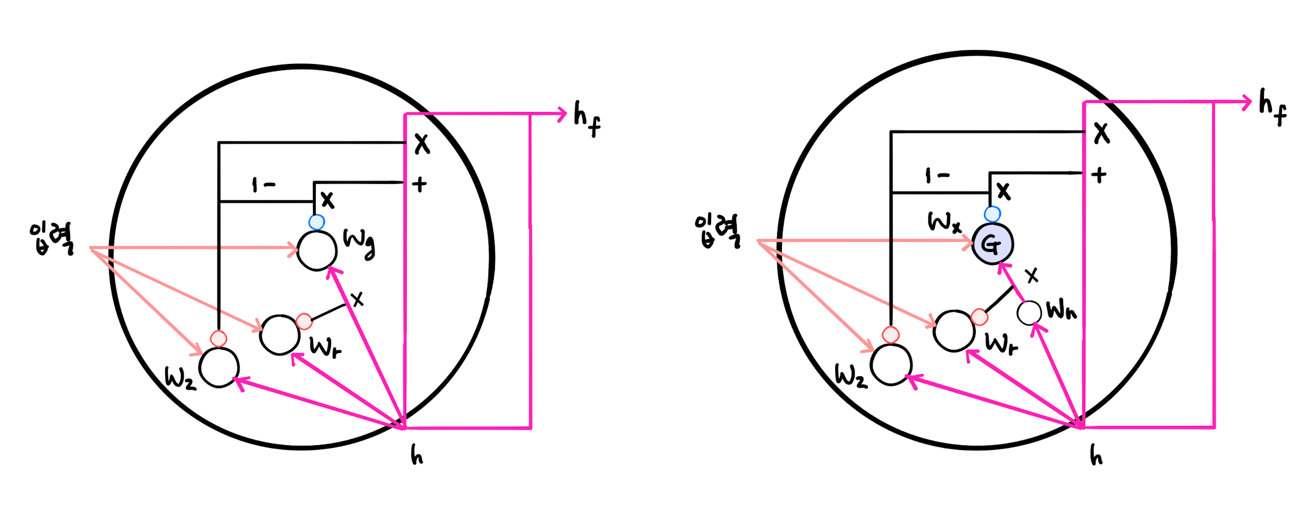

In [29]:
# GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있다.
# 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용한다.
# 여기에도 은닉 상태와 곱해지는 가중치를 합쳐서 나타냈음

# 맨 왼쪽 w_z를 사용하는 셀의 출력이 은닉 상태에서 바로 곱해져 삭제 게이트 역할을 수행한다.
# 이와 똑같은 출력은 1에서 뺀 다음에 가장 오른쪽 w_g를 사용하는 셀의 출력에 곱한다.
# 이는 입력되는 정보를 제어하는 역할을 수행한다.
# 가운데 w_r을 사용하는 셀에서는 출력된 w_g 셀이 사용할 은닉 상태의 정보를 제어한다.

# GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 낸다.

In [32]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8, dropout=0.3, return_sequences=True)) # GRU로 변경함
model4.add(keras.layers.GRU(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
# 파라미터를 계산해보겠다. GRU 셀에는 3개의 작은 셀이 있다.
# 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.
# 입력에 곱하는 가중치는 16 * 8 = 128개이고, 은닉 상태에 곱하는 가중치는 8 * 8 = 64이다.
# 절편은 뉴런마다 하나씩이므로 8개임
# 모두 더하면 128 + 64 + 8 = 200 이런 작은 셀이 3개 이므로 600개임

# 624개가 된 이유는 3개의 절편마다 8개의 뉴런까지 존재하기 때문에 3 * 8 = 24까지 더해짐
# 600 + (3 * 8) = 624
# 텐서플로가 이런 계산 방식을 사용하는 이유는 GRU를 잘 활용하기 위해서임(LSTM 개선점)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 100, 8)              │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 8)                   │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,065 (35.41 KB)

 Trainable params: 9,065 (35.41 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 훈련시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.4982 - loss: 0.6933 - val_accuracy: 0.5356 - val_loss: 0.6926
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.5414 - loss: 0.6923 - val_accuracy: 0.5730 - val_loss: 0.6915
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.5681 - loss: 0.6909 - val_accuracy: 0.5956 - val_loss: 0.6891
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.5877 - loss: 0.6879 - val_accuracy: 0.6110 - val_loss: 0.6842
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.6062 - loss: 0.6823 - val_accuracy: 0.6262 - val_loss: 0.6743
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.6186 - loss: 0.6705 - val_accuracy: 0.6390 - val_loss: 0.6566
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.6506 - loss: 0.6500 - val_accuracy: 0.6620 - val_loss: 0.6290
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 120ms/step - accuracy: 0.6642 -

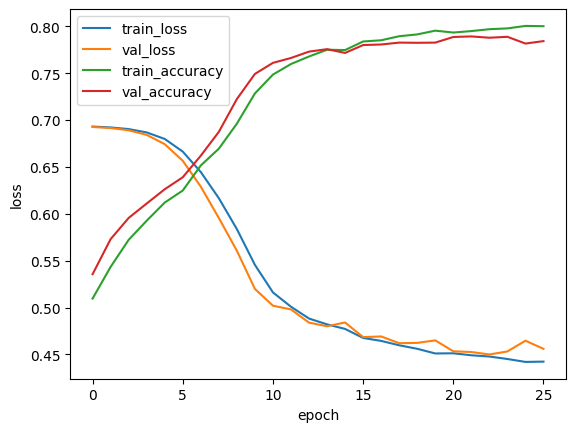

In [34]:
# LSTM : 드롭아웃 전에는 73회 에포크에 82.81% 정확도로 나옴 24분 걸림
# LSTM : 드롭아웃 이후에는 32회 에포크에 81.25% 정확도이고 13분 걸림
# LSTM : 층을 추가하고 return_sequences=True로 진행한 이후 19분에 31회 80.82% 정확도가 나옴
# RGU : 드롭아웃 30% 층을 추가하고 return_sequences=True로 진행한 이후 19분 26회 79.97% 정확도
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [35]:
# Epoch 73/100 드롭아웃 적용 전
# - accuracy: 0.8281 - loss: 0.3811 - val_accuracy: 0.8004 - val_loss: 0.4389
# 0.4389 - 0.3811 = 0.0578

# Epoch 32/100 드롭아웃 적용 후
# - accuracy: 0.8125 - loss: 0.4202 - val_accuracy: 0.7928 - val_loss: 0.4407
# 0.4407 - 0.4202 = 0.0205

# Epoch /100 2개층 LSTN 드롭아웃 적용 후
# - accuracy: 0.8082 - loss: 0.4287 - val_accuracy: 0.7904 - val_loss: 0.4447
# 0.4447 - 0.4287 = 0.016

# Epoch /100 2개층 RGU 드롭아웃 적용 후
# - accuracy: 0.7997 - loss: 0.4449 - val_accuracy: 0.7842 - val_loss: 0.4560
# 0.4560 - 0.4449 = 0.0111 손실율이 점점 감소한다.

In [43]:
# 훈련데이터와 검증 데이터의 훈련이 종료되면 test데이터를 이용해서 마지막 점수를 봐야한다.
# 기존에 저장한 데이터를 불러와 테스트 점수를 본다.
test_seq = pad_sequences(test_input, maxlen=100)    # 테스트 점수로 전처리 해야함

rnn_model = keras.models.load_model('best_2rnn-model.keras')    # 2층으로 만든 LSTM 모델 불러옴

rnn_model.evaluate(test_seq, test_target)   # LSTM 2층으로 만든 테스트 점수

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7944 - loss: 0.4397


[0.43963027000427246, 0.7955999970436096]

In [44]:
test_seq = pad_sequences(test_input, maxlen=100)

gru_model = keras.models.load_model('best-gru-model.keras') # 2층으로 만든 GRU 모델 불러옴

gru_model.evaluate(test_seq, test_target)   # GRU 2층으로 만든 테스트 점수

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.7929 - loss: 0.4511


[0.4493633508682251, 0.7923200130462646]